# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este projeto trata-se de um projeto didático, desenvolvido como um dos requisitos para a conclusão do curso "Profissão: Cientista de Dados" oferecido pela EBAC (Escola Britânica de Artes Criativas). O projeto será realizado com as ferramentas e estratégias aprendidas até o módulo 15 do curso e seu objetivo principal é estudar diversos modelos preditivos de regressão, construindo um modelo preditivo de renda utilizando uma base de dados simulada que busca se aproximar de uma base real.


## Contextualização do Problema

Supõe-se que uma instituição financeira deseja conhecer melhor o perfil de renda de seus novos clientes para diversos fins, como melhor dimensionar o limite de cartões de crédito dos novos clientes, sem a necessidade de solicitar olerites ou documentações que impactem na experiência do cliente.

Para atender a essa demanda, a instituição financeira conduziu um estudo com alguns clientes, comprovando suas rendas por meio de olerites e outros documentos. O objetivo agora é construir um modelo preditivo para estimar a renda com base em algumas variáveis já disponíveis no banco de dados.

## Objetivos do Projeto

Os principais objetivos deste projeto são:

- Construir um modelo preditivo de renda utilizando técnicas de ciência de dados.
- Estimar a renda dos novos clientes com base nas variáveis disponíveis no banco de dados.
- Melhorar a tomada de decisões relacionadas ao dimensionamento do limite de cartões de crédito dos clientes, proporcionando uma experiência mais ágil e conveniente para eles.

## Etapa 2 Crisp-DM: Entendimento dos dados

Nesta etapa, realizaremos uma análise aprofundada dos dados disponíveis para a construção do modelo preditivo de renda. O objetivo é compreender as características, a qualidade e a relevância das variáveis presentes no conjunto de dados simulado, buscando insights valiosos para o desenvolvimento do projeto.


### Dicionário de dados

Descrição das variáveis da base de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência do registro                     | string       |
| id_cliente              |  Identificação do cliente                           | inteiro      |
| sexo                    |  F para sexo Feminino e M para Masculino            | string       |
| posse_de_veiculo        |  Se o cliente possui ou não automóvel               | booleano     |
| posse_de_imovel         |  Se o cliente tem ou não filhos                     | booleano     |
| qtd_filhos              |  Quantidade de filhos do cliente                    | inteiro      |
| tipo_renda              |  Tipo da renda do cliente                           | string       |
| educacao                |  Nível de escolaridade do cliente                   | string       |
| estado_civil            |  Estado civil do cliente                            | string       |
| tipo_residencia         |  Tipo da residência do cliente                      | string       |
| idade                   |  Idade do cliente                                   | inteiro      |
| tempo_emprego           |  Tempo que o cliente está no atual emprego          | decimal      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram com o cliente      | decimal      |
| renda                   |  Renda mensal do cliente                            | decimal      |




#### Carregando os pacotes

In [17]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree

%matplotlib inline
# %matplotlib notebook

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [18]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [19]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-  67,5% dos clientes da base de dados são do sexo Feminino, 60,9% não possuem veículo, 67,6% possuem imóvel, 69,2% não possuem filhos.
 - Todas as variáveis possuem 15.000 registros exceto "*tempo_emprego*" que possue dados faltantes e deverá ser tratada;

### Entendimento dos dados - Bivariadas




Vamos criar alguns gráficos utilizando a variável renda no eixo y, buscando alguma correlação entre as variáveis explicativas e a variável renda.</span>


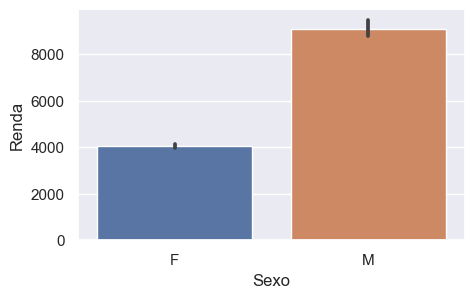

In [20]:
sns.set_theme(style="darkgrid")
plt.rc('figure', figsize=(5,3))
ax = sns.barplot(x="sexo", y="renda",
                   data=renda, dodge=True, errorbar=('ci', 95)).set(xlabel='Sexo',ylabel='Renda')

Homens ganham mais que mulheres.

C:\Users\willi\AppData\Local\Temp\ipykernel_4232\663950144.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(ax = axes[0], x="posse_de_veiculo", y="renda",


[Text(0.5, 0, 'Posse de Imóvel'), Text(0, 0.5, 'Renda')]

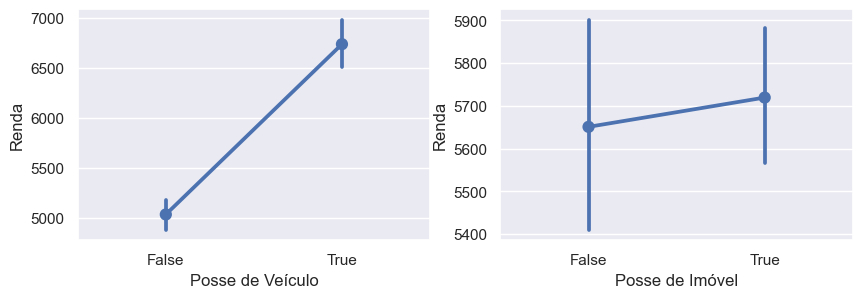

In [21]:
plt.rc('figure', figsize=(10, 3))
fig, axes = plt.subplots(1,2)

sns.pointplot(ax = axes[0], x="posse_de_veiculo", y="renda",
                   data=renda, dodge=True, ci = 95).set(xlabel='Posse de Veículo',ylabel='Renda')

sns.pointplot(ax = axes[1], x="posse_de_imovel", y="renda",
                   data=renda, dodge=True, errorbar=('ci', 95)).set(xlabel='Posse de Imóvel',ylabel='Renda')

- O indíce de clientes que possuem veículo aumenta conforme a renda.

- Já o indíce de imóvel não sofre tanta alteração.

C:\Users\willi\AppData\Local\Temp\ipykernel_4232\1982887813.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(ax = axes[0], x="tempo_emprego", y="renda",
C:\Users\willi\AppData\Local\Temp\ipykernel_4232\1982887813.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(ax = axes[1], x="idade", y="renda",


[Text(0.5, 0, 'Idade'), Text(0, 0.5, 'Renda')]

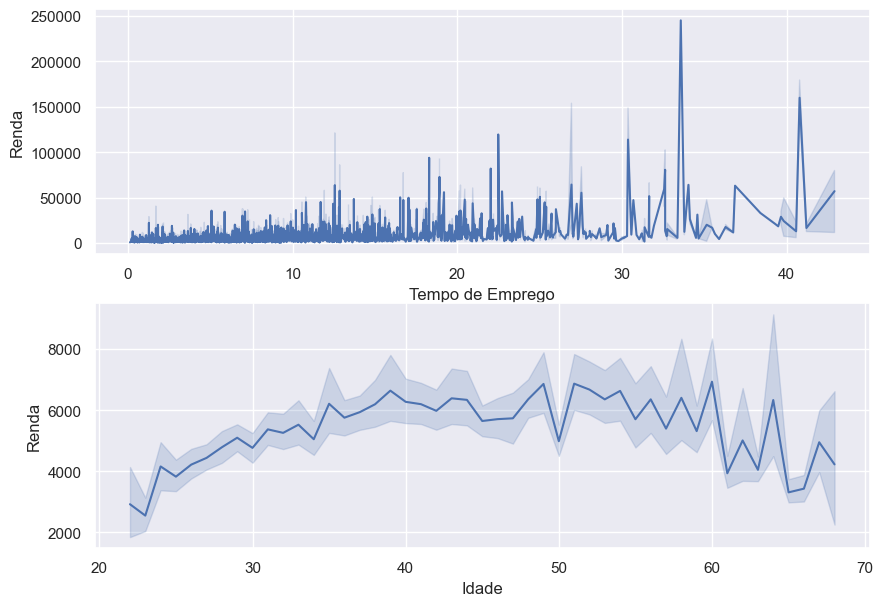

In [22]:
plt.rc('figure', figsize=(10, 7))
fig, axes = plt.subplots(2,1)

sns.lineplot(ax = axes[0], x="tempo_emprego", y="renda",
                   data=renda, ci = 95).set(xlabel='Tempo de Emprego',ylabel='Renda')

sns.lineplot(ax = axes[1], x="idade", y="renda",
                   data=renda, ci = 95).set(xlabel='Idade',ylabel='Renda')

C:\Users\willi\AppData\Local\Temp\ipykernel_4232\1514883878.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(ax = axes[0], x="tipo_renda", y="renda",
C:\Users\willi\AppData\Local\Temp\ipykernel_4232\1514883878.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(ax = axes[1], x="educacao", y="renda",
C:\Users\willi\AppData\Local\Temp\ipykernel_4232\1514883878.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(ax = axes[2], x="estado_civil", y="renda",
C:\Users\willi\AppData\Local\Temp\ipykernel_4232\1514883878.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(ax = axes[3], x="tipo_residencia", y="renda",


[Text(0.5, 0, 'Tipo de Residência'), Text(0, 0.5, 'Renda')]

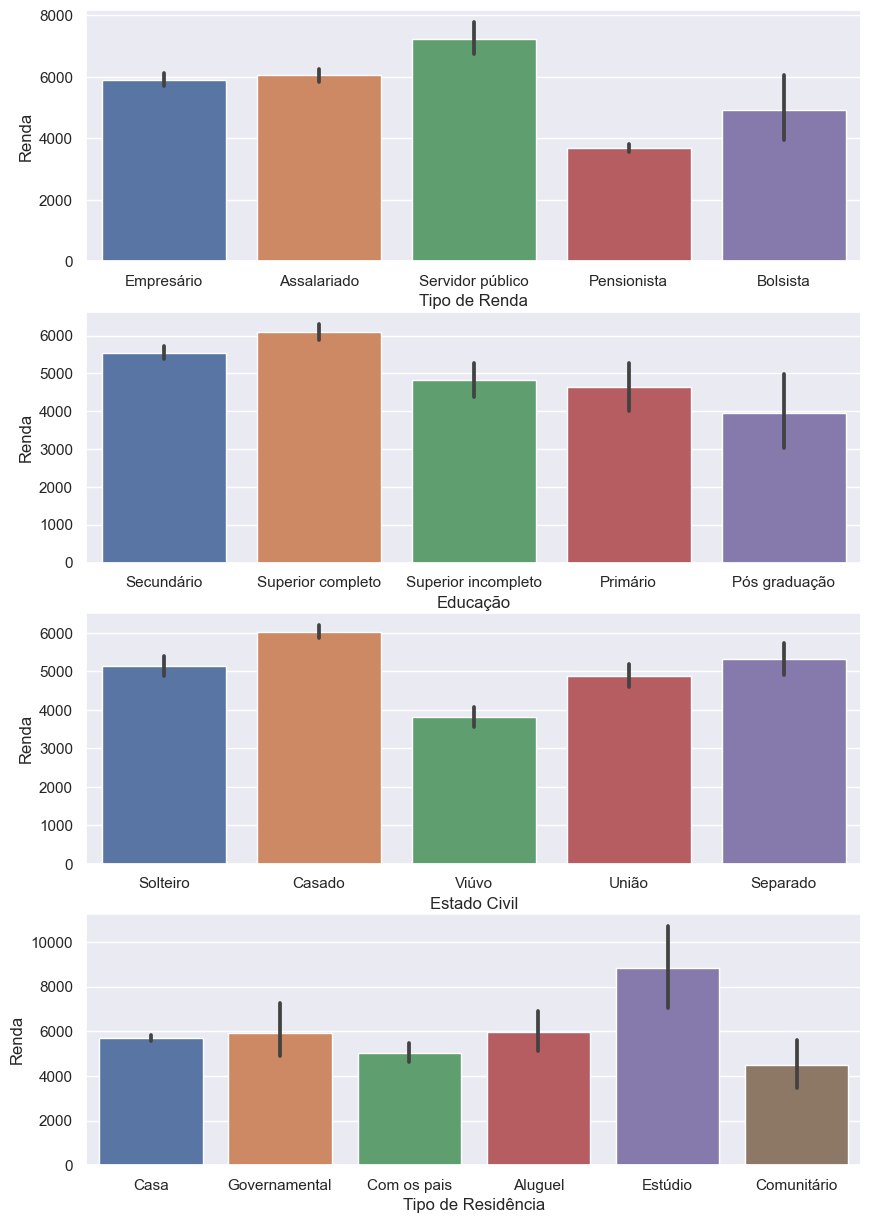

In [23]:
plt.rc('figure', figsize=(10, 15))
fig, axes = plt.subplots(4,1)

sns.barplot(ax = axes[0], x="tipo_renda", y="renda",
                   data=renda, ci = 95).set(xlabel='Tipo de Renda',ylabel='Renda')

sns.barplot(ax = axes[1], x="educacao", y="renda",
                   data=renda, ci = 95).set(xlabel='Educação',ylabel='Renda')

sns.barplot(ax = axes[2], x="estado_civil", y="renda",
                   data=renda, ci = 95).set(xlabel='Estado Civil',ylabel='Renda')

sns.barplot(ax = axes[3], x="tipo_residencia", y="renda",
                   data=renda, ci = 95).set(xlabel='Tipo de Residência',ylabel='Renda')


#### Correlação entre as variáveis

In [24]:
# mostrando a matriz de correlação
renda.iloc[:,2:].corr() # retirado a coluna id do cliente

C:\Users\willi\AppData\Local\Temp\ipykernel_4232\1891711713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  renda.iloc[:,2:].corr() # retirado a coluna id do cliente


,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
id_cliente,1.000000,-0.012072,-0.102863,0.030296,-0.057812,-0.036373,0.037951,-0.009129
posse_de_veiculo,-0.012072,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493
posse_de_imovel,-0.102863,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880
qtd_filhos,0.030296,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.057812,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.036373,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.037951,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,-0.009129,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000


C:\Users\willi\AppData\Local\Temp\ipykernel_4232\2525041460.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(renda.iloc[:,2:].corr(), figsize=(10, 10), center = 0, cmap=cmap)


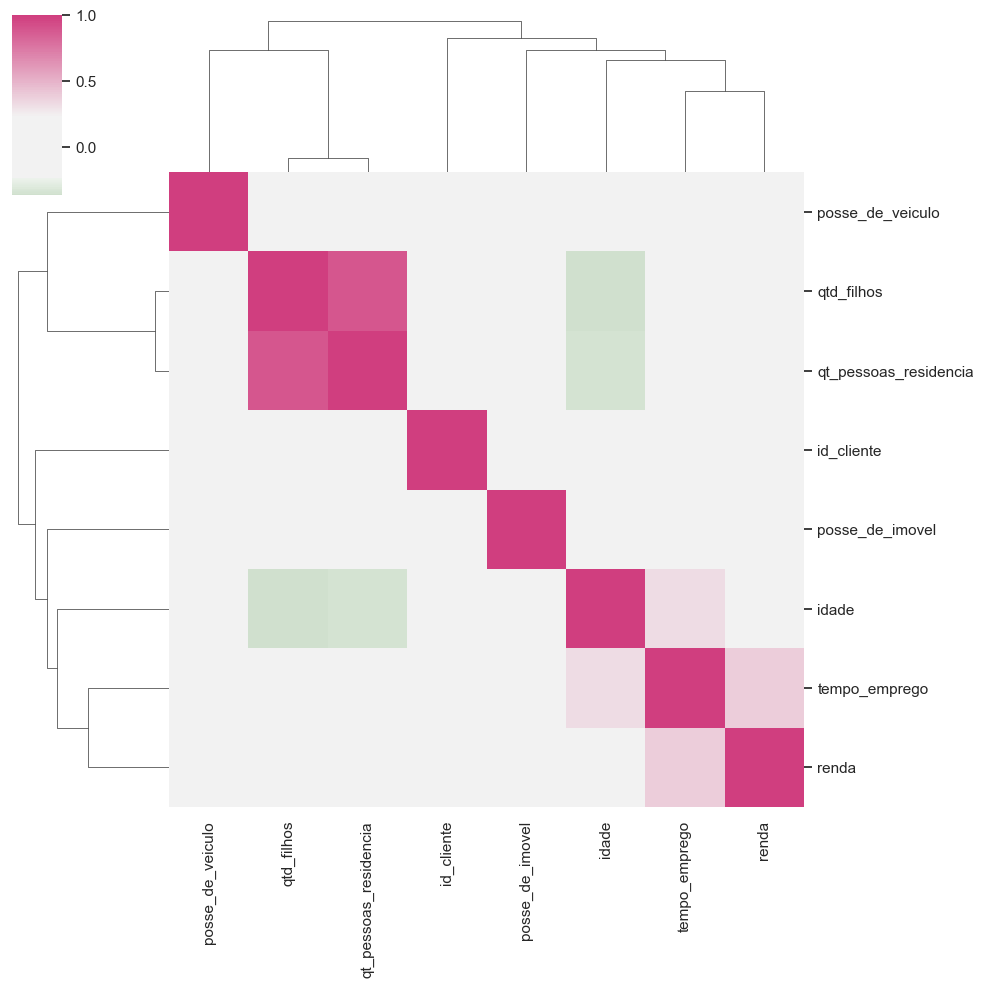

In [25]:
#gráfico da matriz
#construindo a paleta de cores
cmap = sns.diverging_palette(h_neg=125, #a cor do menor valor da matriz :-1
h_pos=350, #a cor do maior valor da matriz :+1
as_cmap=True, # Se True, retorna uma classe :class:`matplotlib.colors.Colormap`
sep = 60, #Tamanho da região intermediária
center = 'light'# Se o centro da paleta é claro(light) ou escuro(dark)
)

#construindo o gráfico
sns.clustermap(renda.iloc[:,2:].corr(), figsize=(10, 10), center = 0, cmap=cmap)

Tempo no emprego e posse de veículo são as variáveis que mais tem correlação com a renda.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Selecionamos as variáveis que não se mostraram importantes na previsão.

In [26]:
renda.drop(columns=['Unnamed: 0', 'data_ref'], inplace=True) # dropando as colunas que não são util para analise
renda.head(1)

,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [27]:
renda.fillna(0, inplace = True) # substituindo valores faltantes por zero
renda['id_cliente'].duplicated().value_counts()
renda.drop_duplicates(subset = 'id_cliente', keep = 'first', inplace = True) # dropando dados duplicados

In [28]:
renda.drop(columns=['id_cliente'], inplace=True) # dropando coluna do id cliente que não sera necessaria para analise 
renda.head(1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [29]:
renda.duplicated().value_counts()

False    9845
dtype: int64

##### Criando dummies

In [30]:
renda_dummies = pd.get_dummies(renda, columns=['sexo', 'posse_de_veiculo', 
                                               'posse_de_imovel', 'tipo_renda', 
                                               'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
renda_dummies.head(1)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,26,6.60274,1.0,8060.34,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [31]:
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9845 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     9845 non-null   int64  
 1   idade                          9845 non-null   int64  
 2   tempo_emprego                  9845 non-null   float64
 3   qt_pessoas_residencia          9845 non-null   float64
 4   renda                          9845 non-null   float64
 5   sexo_M                         9845 non-null   uint8  
 6   posse_de_veiculo_True          9845 non-null   uint8  
 7   posse_de_imovel_True           9845 non-null   uint8  
 8   tipo_renda_Bolsista            9845 non-null   uint8  
 9   tipo_renda_Empresário          9845 non-null   uint8  
 10  tipo_renda_Pensionista         9845 non-null   uint8  
 11  tipo_renda_Servidor público    9845 non-null   uint8  
 12  educacao_Pós graduação         9845 non-null   

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Vamos trabalhar com a regressão LASSO.

In [32]:
X_train_base, X_test_base = train_test_split(renda, train_size=0.8, random_state=100)

### Rodando o modelo


In [33]:
print(renda['tipo_renda'].value_counts())
print(renda['educacao'].value_counts())
print(renda['estado_civil'].value_counts())
print(renda['tipo_residencia'].value_counts())

Assalariado         5054
Empresário          2259
Pensionista         1689
Servidor público     836
Bolsista               7
Name: tipo_renda, dtype: int64
Secundário             6028
Superior completo      3315
Superior incompleto     381
Primário                107
Pós graduação            14
Name: educacao, dtype: int64
Casado      6866
Solteiro    1181
União        744
Separado     608
Viúvo        446
Name: estado_civil, dtype: int64
Casa             8882
Com os pais       444
Governamental     284
Aluguel           128
Estúdio            64
Comunitário        43
Name: tipo_residencia, dtype: int64


In [34]:
X = patsy.dmatrices('''renda ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_train_base)

In [35]:
modelo = smf.ols(X, data = X_train_base).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:33:34   Log-Likelihood:                -81249.
No. Observations:                7876   AIC:                         1.625e+05
Df Residuals:                    7853   BIC:                         1.627e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -5634.4519   2813.849     -2.002      0.045   -1.12e+04    -118.559
C(sexo)[T.M]                                       6024.9132    195.060     30.887      0.000    5642.543    6407.283
C(posse_de_veiculo)[T.True]                          20.3172    184.944      0.110      0.913    -342.222     382.857
C(posse_de_imovel)[T.True]                          231.4645    181.808      1.273      0.203    -124.927     587.856
C(tipo_renda)[T.Bolsista]                         -1278.8164   3282.637     -0.390      0.697   -7713.659    5156.026
C(tipo_renda)[T.Empresário]                         959.8908    210.604      4.558      0.000     547.050    1372.731
C(tipo_renda)[T.Pensionista]                       2751.3821    337.277      8.158      0.000    2090.229    3412.535
C(tipo_renda)[T.Servidor público]                   106.2286    311.318      0.341      0.733    -504.038     716.496
C(educacao, Treatment(2))[T.Primário]              -275.6413    778.241     -0.354      0.723   -1801.201    1249.919
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]      721.0205    182.112      3.959      0.000     364.032    1078.009
C(educacao, Treatment(2))[T.Superior incompleto]   -297.9025    441.927     -0.674      0.500   -1164.197     568.392
C(estado_civil)[T.Separado]                        1226.6313   1428.001      0.859      0.390   -1572.630    4025.892
C(estado_civil)[T.Solteiro]                         983.9963   1400.796      0.702      0.482   -1761.937    3729.930
C(estado_civil)[T.União]                           -331.6887    316.745     -1.047      0.295    -952.594     289.217
C(estado_civil)[T.Viúvo]                           1101.7417   1447.366      0.761      0.447   -1735.480    3938.963
C(tipo_residencia, Treatment(1))[T.Aluguel]         731.3053    748.870      0.977      0.329    -736.679    2199.290
C(tipo_residencia, Treatment(1))[T.Com os pais]      -1.2966    405.959     -0.003      0.997    -797.084     794.491
C(tipo_residencia, Treatment(1))[T.Comunitário]    -256.7598   1197.699     -0.214      0.830   -2604.569    2091.049
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]   797.5744    498.213      1.601      0.109    -179.057    1774.205
qtd_filhos                                        -1236.2494   1388.292     -0.890      0.373   -3957.670    1485.172
idade                                                46.5222     10.774      4.318      0.000      25.403      67.642
tempo_emprego  

In [36]:
X_test_base['pred_renda'] = modelo.predict(X_test_base)
r = X_test_base[['pred_renda', 'renda']].corr().iloc[0,1]
r**2

0.24022322964440707

Alternado a variável reposta do log.

In [37]:
X = patsy.dmatrices('''np.log(renda) ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade/
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_train_base)

In [38]:
modelo = smf.ols(X, data = X_train_base).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     525.7
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:33:45   Log-Likelihood:                -8722.4
No. Observations:                7876   AIC:                         1.746e+04
Df Residuals:                    7869   BIC:                         1.752e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3869      0.041    180.687      0.000       7.307       7.467
C(sexo)[T.M]                                          0.7735      0.019     40.169      0.000       0.736       0.811
C(posse_de_veiculo)[T.True]                           0.0382      0.018      2.090      0.037       0.002       0.074
C(posse_de_imovel)[T.True]                            0.0912      0.018      5.117      0.000       0.056       0.126
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                            0.0220      0.012      1.890      0.059      -0.001       0.045
idade                                                 0.0043      0.001      5.287      0.000       0.003       0.006
idade:tempo_emp

In [39]:
X_test_base['log_renda'] = np.log(X_test_base['renda'])
X_test_base['pred_renda'] = modelo.predict(X_test_base)
r = X_test_base[['pred_renda', 'log_renda']].corr().iloc[0,1]
r**2

0.32336821536704796

o R² utilizando o log é maior do que utilizando só renda.

Diminuindo o overfitting

In [40]:
X_renda = renda_dummies.drop(columns = ['renda']).copy()
y_renda = np.log(renda_dummies['renda'])

In [41]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_renda, y_renda, train_size=0.8, random_state=100)

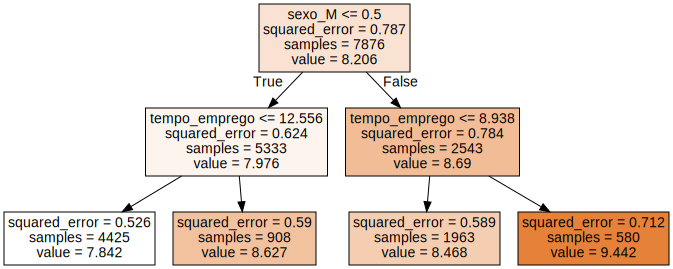

In [42]:
reg_tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)

reg_tree.fit(X_train_tree, y_train_tree)

dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                                feature_names=X_renda.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [37]:
X = patsy.dmatrices('''np.log(renda) ~ C(sexo)
                    + C(posse_de_veiculo)
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + idade
                    + tempo_emprego
                    + 1''', X_train_base)

modelo = smf.ols(X, data = X_train_base).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     874.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:07:00   Log-Likelihood:                -10925.
No. Observations:                9944   AIC:                         2.186e+04
Df Residuals:                    9938   BIC:                         2.191e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.2811      0.035    205.529      0.000       7.212       7.351
C(sexo)[T.M]                    0.7690      0.016     47.245      0.000       0.737       0.801
C(posse_de_veiculo)[T.True]     0.0568      0.016      3.616      0.000       0.026       0.088
C(posse_de_imovel)[T.True]      0.0832      0.015      5.401      0.000       0.053       0.113
qtd_filhos                           0          0        nan        nan           0           0
idade                           0.0037      0.001      4.488      0.000       0.002       0.005
tempo_emprego                   0.0617      0.001     53.078      0.000       0.059       0.064
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.020
Skew:                           0.003   Prob(JB):                        0.990
Kurtosis:                       3.001   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X_train_all, X_test_all = train_test_split(renda_dummies, train_size=0.8, random_state=100)

modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + posse_de_veiculo_True
                    + posse_de_imovel_True
                    + idade
                    + tempo_emprego''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     651.4
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:07:01   Log-Likelihood:                -8645.5
No. Observations:                7876   AIC:                         1.730e+04
Df Residuals:                    7870   BIC:                         1.735e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.1387      0.039    185.046      0.000       7.063       7.214
sexo_M                    0.7839      0.019     41.133      0.000       0.747       0.821
posse_de_veiculo_True     0.0375      0.018      2.078      0.038       0.002       0.073
posse_de_imovel_True      0.0938      0.018      5.317      0.000       0.059       0.128
idade                     0.0087      0.001     11.465      0.000       0.007       0.010
tempo_emprego             0.0557      0.001     46.116      0.000       0.053       0.058
==============================================================================
Omnibus:                        1.952   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.971
Skew:                          -0.007   Prob(JB):                        0.373
Kurtosis:                       3.076   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + posse_de_imovel_True
                    + idade
                    + tempo_emprego''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.1)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     780.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:07:04   Log-Likelihood:                -8647.6
No. Observations:                7876   AIC:                         1.731e+04
Df Residuals:                    7871   BIC:                         1.735e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.1556      0.038    189.709      0.000       7.082       7.230
sexo_M                   0.7970      0.018     44.299      0.000       0.762       0.832
posse_de_imovel_True     0.0944      0.018      5.352      0.000       0.060       0.129
idade                    0.0085      0.001     11.308      0.000       0.007       0.010
tempo_emprego            0.0557      0.001     46.129      0.000       0.053       0.058
==============================================================================
Omnibus:                        1.869   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.882
Skew:                          -0.007   Prob(JB):                        0.390
Kurtosis:                       3.074   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + posse_de_imovel_True
                    + idade
                    + tempo_emprego''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.5)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     965.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:07:07   Log-Likelihood:                -8661.9
No. Observations:                7876   AIC:                         1.733e+04
Df Residuals:                    7872   BIC:                         1.737e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.2003      0.037    195.407      0.000       7.128       7.273
sexo_M                   0.7948      0.018     44.113      0.000       0.760       0.830
posse_de_imovel_True          0          0        nan        nan           0           0
idade                    0.0090      0.001     12.009      0.000       0.008       0.010
tempo_emprego            0.0555      0.001     45.921      0.000       0.053       0.058
==============================================================================
Omnibus:                        1.756   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.751
Skew:                          -0.013   Prob(JB):                        0.417
Kurtosis:                       3.069   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
modelo = smf.ols('''np.log(renda) ~ sexo_M
                    + idade
                    + I(idade**2)
                    + tempo_emprego
                    + I(tempo_emprego**2)''', data = X_train_all).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.8
                         , alpha = 0.01)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     647.7
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:07:35   Log-Likelihood:                -8653.0
No. Observations:                7876   AIC:                         1.732e+04
Df Residuals:                    7870   BIC:                         1.737e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.6038      0.135     56.306      0.000       7.339       7.869
sexo_M                    0.7933      0.018     44.047      0.000       0.758       0.829
idade                    -0.0130      0.007     -2.003      0.045      -0.026      -0.000
I(idade ** 2)             0.0003    7.3e-05      3.506      0.000       0.000       0.000
tempo_emprego             0.0666      0.003     20.072      0.000       0.060       0.073
I(tempo_emprego ** 2)    -0.0004      0.000     -3.254      0.001      -0.001      -0.000
==============================================================================
Omnibus:                        1.840   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.847
Skew:                          -0.009   Prob(JB):                        0.397
Kurtosis:                       3.073   Cond. No.                     3.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
r**2

0.25660471091832293

## Etapa 5 Crisp-DM: Avaliação dos resultados


Conseguimos um modelo que prevê a variável renda que contempla 34,27% da variância.

</span>


## Etapa 6 Crisp-DM: Implantação
Utilizando-se da ferramenta Streamlit, será construído uma ferramenta que fará de maneira interativa a análise descritiva dos dados dos clientes utilizados nesse projeto.

Posteriormente, o modelo preditivo originado desse projeto poderia ser implantado em uma aplicação que dimensione o limite de cartões de crédito dos clientes com certo grau de automação baseado em suas rendas estimadas. Ajudando a evitar concessões de crédito excessivas ou limites muito baixos, reduzindo riscos e otimizando a gestão de crédito.